# Dataset analysis

# Step 1 - Library installation
Run this command to install the necessary packages.

In [ ]:
!pip install pandas matplotlib seaborn biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.5 MB/s eta 0:00:00


# Step 2 - Load the dataset
Load the TSV data into a Pandas DataFrame. Take a look at the data.


In [ ]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame
testing = pd.read_csv('data/testing_metadata.tsv', sep='\t')
training = pd.read_csv('data/training_metadata.tsv', sep='\t')

# Log transform the data for a future analysis
testing['logarithm_base10'] = np.log10(testing['Length'])
training['logarithm_base10'] = np.log10(training['Length'])

# Split the datasets depending on the SP presence
testing_SP = testing[~pd.isna(testing['End'])]
testing_noSP = testing[pd.isna(testing['End'])]
training_SP = training[~pd.isna(training['End'])]
training_noSP = training[pd.isna(training['End'])]


# Step 3 - Plots
We analyze the dasates characteristics using different types of distribution plots.

## 1. Signal Peptide lenghts

22.78612059158134
22.908675799086758


(0.0, 70.0)

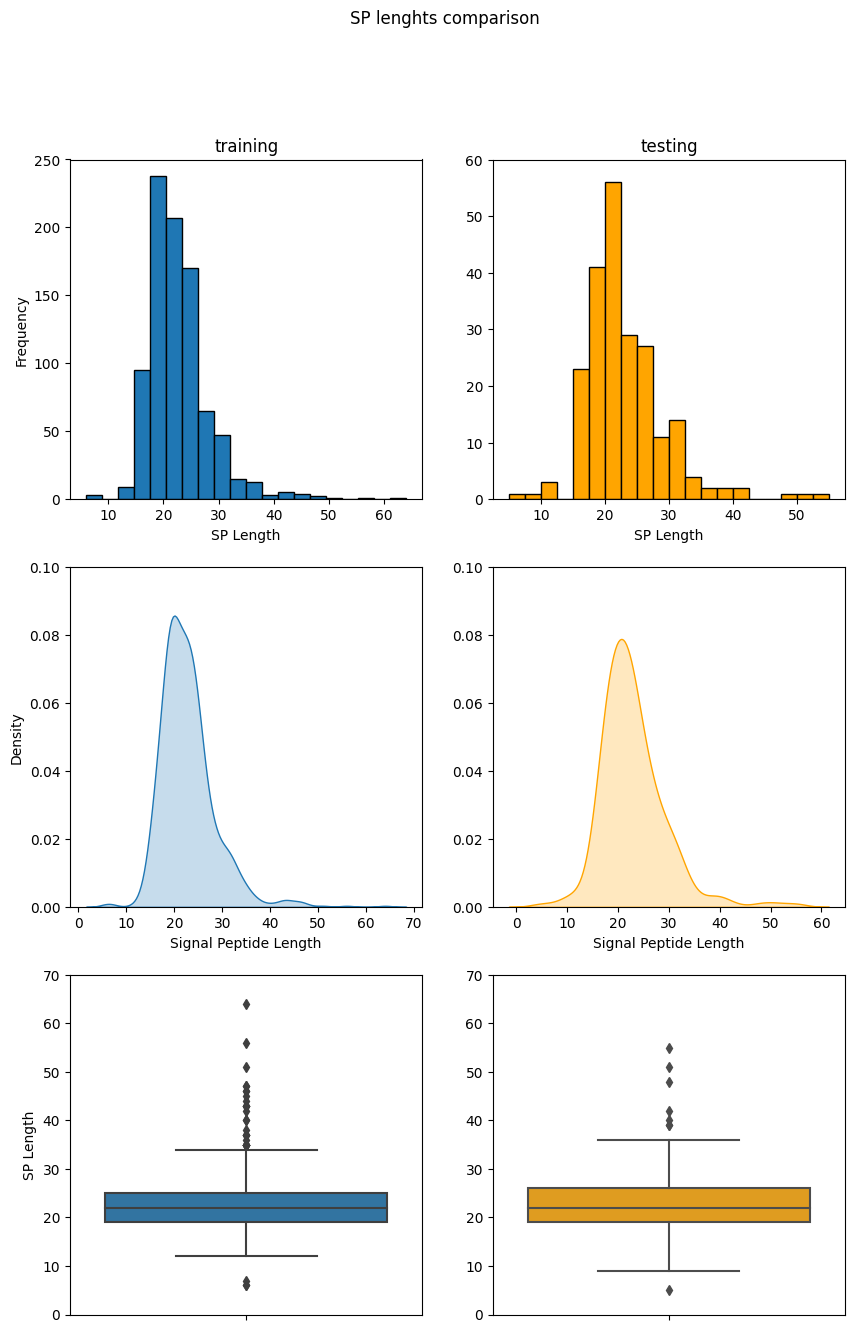

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(training_SP['End'].mean())
print(testing_SP['End'].mean())

fig, axs = plt.subplots(3,2, figsize=(10, 15))
fig.suptitle('SP lenghts comparison')

# histogram
axs[0,0].hist(training_SP['End'], bins=20, edgecolor='k')
axs[0,0].set_xlabel('SP Length')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('training')
axs[0,0].set_ylim(0,250)

axs[0,1].hist(testing_SP['End'], bins=20, color='orange', edgecolor='k')
axs[0,1].set_xlabel('SP Length')
axs[0,1].set_title('testing')
axs[0,1].set_ylim(0,60)

# density plot
sns.kdeplot(training_SP['End'], fill=True, ax=axs[1,0])
axs[1,0].set_xlabel('Signal Peptide Length')
axs[1,0].set_ylabel('Density')
axs[1,0].set_ylim(0,0.1)

sns.kdeplot(testing_SP['End'], fill=True, color='orange', ax=axs[1,1])
axs[1,1].set_xlabel('Signal Peptide Length')
axs[1,1].set_ylabel('')
axs[1,1].set_ylim(0,0.1)

# boxplot
sns.boxplot(y=training_SP['End'], ax=axs[2,0])
axs[2,0].set_ylabel('SP Length')
axs[2,0].set_ylim(0,70)

sns.boxplot(y=testing_SP['End'], color='orange', ax=axs[2,1])
axs[2,1].set_ylabel('')
axs[2,1].set_ylim(0,70)


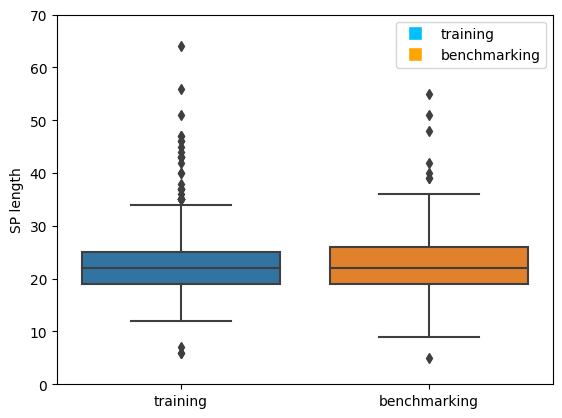

In [ ]:
# boxplots adjustment
data = pd.DataFrame({'training': training_SP['End'], 'benchmarking': testing_SP['End']})
# palette = ['deepskyblue', 'orange']
legend_labels = ['training', 'benchmarking']
legend_handle = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in palette]

# boxplot
asd = sns.boxplot(data=data)
asd.set_ylabel('SP length')
asd.legend(legend_handle, legend_labels, loc='best')
asd.set_ylim(0,70)

sns.set_context(rc={"figure.figsize": (8, 4)})

plt.savefig('data/sp_length_box.png')

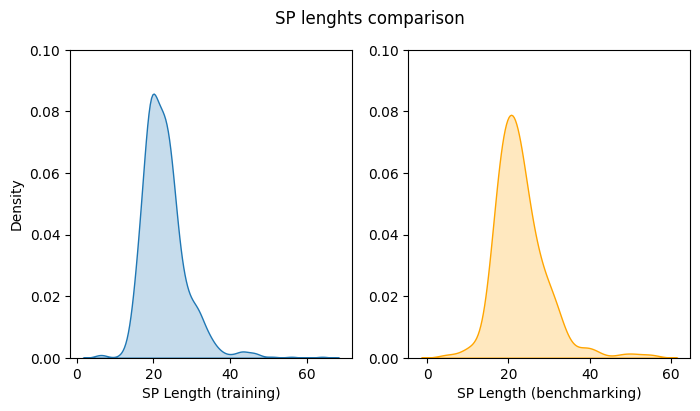

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
fig.suptitle('SP lenghts comparison')

sns.kdeplot(training_SP['End'], fill=True, ax=axs[0])
axs[0].set_xlabel('SP Length (training)')
axs[0].set_ylabel('Density')
axs[0].set_ylim(0,0.1)

sns.kdeplot(testing_SP['End'], fill=True, color='orange', ax=axs[1])
axs[1].set_xlabel('SP Length (benchmarking)')
axs[1].set_ylabel('')
axs[1].set_ylim(0,0.1)

plt.savefig('data/sp_length_density.png')

## 2. Protein lengths

(1.3, 4.2)

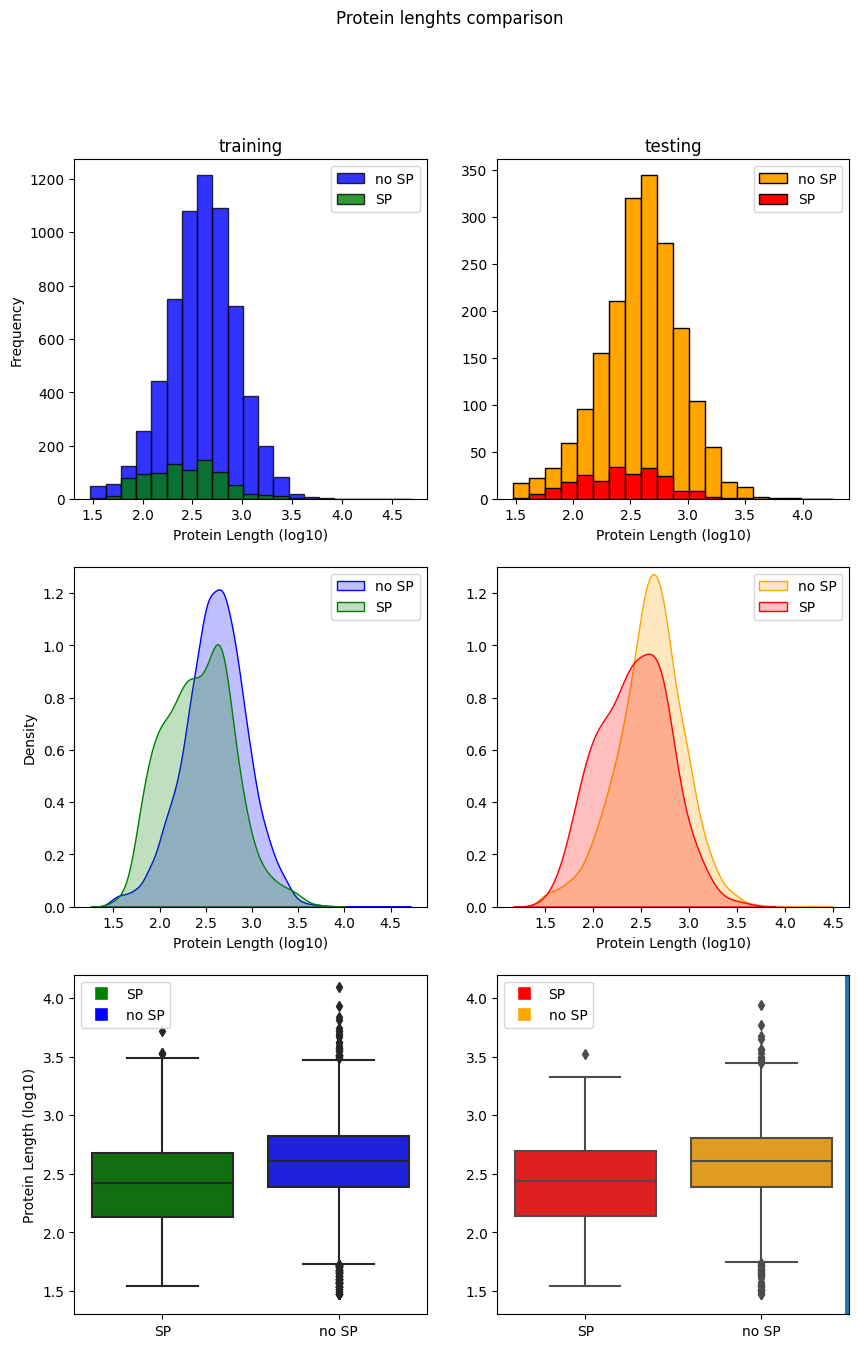

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))
fig.suptitle('Protein lenghts comparison')

# bin size adjustment
combined_data_tr = np.concatenate([training_SP['logarithm_base10'], training_noSP['logarithm_base10']])
min_tr = np.min(combined_data_tr)
max_tr = np.max(combined_data_tr)
bin_width_tr = (max_tr - min_tr) / 20
combined_data_test = np.concatenate([testing_SP['logarithm_base10'], testing_noSP['logarithm_base10']])
min_test = np.min(combined_data_test)
max_test = np.max(combined_data_test)
bin_width_test = (max_test - min_test) / 20

# histogram
axs[0,0].hist(training_noSP['logarithm_base10'], bins=np.arange(min_tr, max_tr + bin_width_tr, bin_width_tr), alpha=0.8, label='no SP', edgecolor='k', color='blue')
axs[0,0].hist(training_SP['logarithm_base10'], bins=np.arange(min_tr, max_tr + bin_width_tr, bin_width_tr), alpha=0.8, label='SP', edgecolor='k', color='green')
axs[0,0].legend(loc='upper right')
axs[0,0].set_xlabel('Protein Length (log10)')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('training')

bins = plt.hist(testing_noSP['logarithm_base10'], bins=20)
axs[0,1].hist(testing_noSP['logarithm_base10'], bins=np.arange(min_test, max_test + bin_width_test, bin_width_test), label='no SP', color='orange', edgecolor='k')
axs[0,1].hist(testing_SP['logarithm_base10'], bins=np.arange(min_test, max_test + bin_width_test, bin_width_test), label='SP', color='red', edgecolor='k')
axs[0,1].legend(loc='upper right')
axs[0,1].set_xlabel('Protein Length (log10)')
axs[0,1].set_title('testing')

# density plot
sns.kdeplot(training_noSP['logarithm_base10'], label='no SP', color='blue', fill=True, ax=axs[1,0])
sns.kdeplot(training_SP['logarithm_base10'], label='SP', color='green', fill=True, ax=axs[1,0])
axs[1,0].legend(loc='upper right')
axs[1,0].set_xlabel('Protein Length (log10)')
axs[1,0].set_ylabel('Density')
axs[1,0].set_ylim(0,1.3)

sns.kdeplot(testing_noSP['logarithm_base10'], label='no SP', color='orange', fill=True, ax=axs[1,1])
sns.kdeplot(testing_SP['logarithm_base10'], label='SP', color='red', fill=True, ax=axs[1,1])
axs[1,1].legend(loc='upper right')
axs[1,1].set_xlabel('Protein Length (log10)')
axs[1,1].set_ylabel('')
axs[1,1].set_ylim(0,1.3)

# boxplots adjustment
data_tr = pd.DataFrame({'SP': training_SP['logarithm_base10'], 'no SP': training_noSP['logarithm_base10']})
data_test = pd.DataFrame({'SP': testing_SP['logarithm_base10'], 'no SP': testing_noSP['logarithm_base10']})
palette_tr = ['green', 'blue']
palette_test = ['red', 'orange']
legend_labels = ['SP', 'no SP']
legend_handle_tr = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in palette_tr]
legend_handle_test = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in palette_test]

# boxplot
sns.boxplot(data=data_tr, palette=palette_tr, ax=axs[2,0])
axs[2,0].set_ylabel('Protein Length (log10)')
axs[2,0].legend(legend_handle_tr, legend_labels, loc='best')
axs[2,0].set_ylim(1.3,4.2)

sns.boxplot(data=data_test, palette=palette_test, ax=axs[2,1])
axs[2,1].legend(legend_handle_test, legend_labels, loc='best')
axs[2,1].set_ylabel('')
axs[2,1].set_ylim(1.3,4.2)



## 3. Amino acids composition

We can use the sequences to calculate the amino acid composition, accounting for the end position of each SP sequence.
The resulting compositions are stored in a dictionary.

In [ ]:
from Bio import SeqIO

# Create a dictionary to store amino acid compositions
training_composition = {}

# Create a list of possible amino acid, we are not considering 'X'
amino = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

# Parse the FASTA file and calculate amino acid compositions

for i, row in training_SP.iterrows():
    sp_length = int(row["End"])
    sequence = str(row["Sequence"])
    signal_peptide = sequence[:sp_length]
    for aa in amino:
        training_composition[aa] = training_composition.get(aa, 0) + signal_peptide.count(aa)

print(training_composition)

{'A': 2874, 'R': 661, 'N': 204, 'D': 172, 'C': 586, 'Q': 413, 'E': 268, 'G': 1223, 'H': 217, 'I': 898, 'L': 4399, 'K': 443, 'M': 1251, 'F': 1009, 'P': 823, 'S': 1491, 'T': 902, 'W': 348, 'Y': 207, 'V': 1629}


In [ ]:
testing_composition = {}

for i, row in testing_SP.iterrows():
    sp_length = int(row["End"])
    sequence = str(row["Sequence"])
    signal_peptide = sequence[:sp_length]
    for aa in amino:
        testing_composition[aa] = testing_composition.get(aa, 0) + signal_peptide.count(aa)

print(testing_composition)

{'A': 675, 'R': 159, 'N': 57, 'D': 46, 'C': 135, 'Q': 99, 'E': 76, 'G': 281, 'H': 64, 'I': 241, 'L': 1092, 'K': 121, 'M': 324, 'F': 245, 'P': 215, 'S': 368, 'T': 237, 'W': 89, 'Y': 55, 'V': 438}


This part exports the dictionaries as CSV files, Sheets is used for visualization.

In [ ]:
import csv

with open('data/testing_composition.csv', 'w') as f:
    for key in testing_composition.keys():
        f.write("%s, %s\n" % (key, testing_composition[key]))

with open('data/training_composition.csv', 'w') as f:
    for key in training_composition.keys():
        f.write("%s, %s\n" % (key, training_composition[key]))

Here are the results.

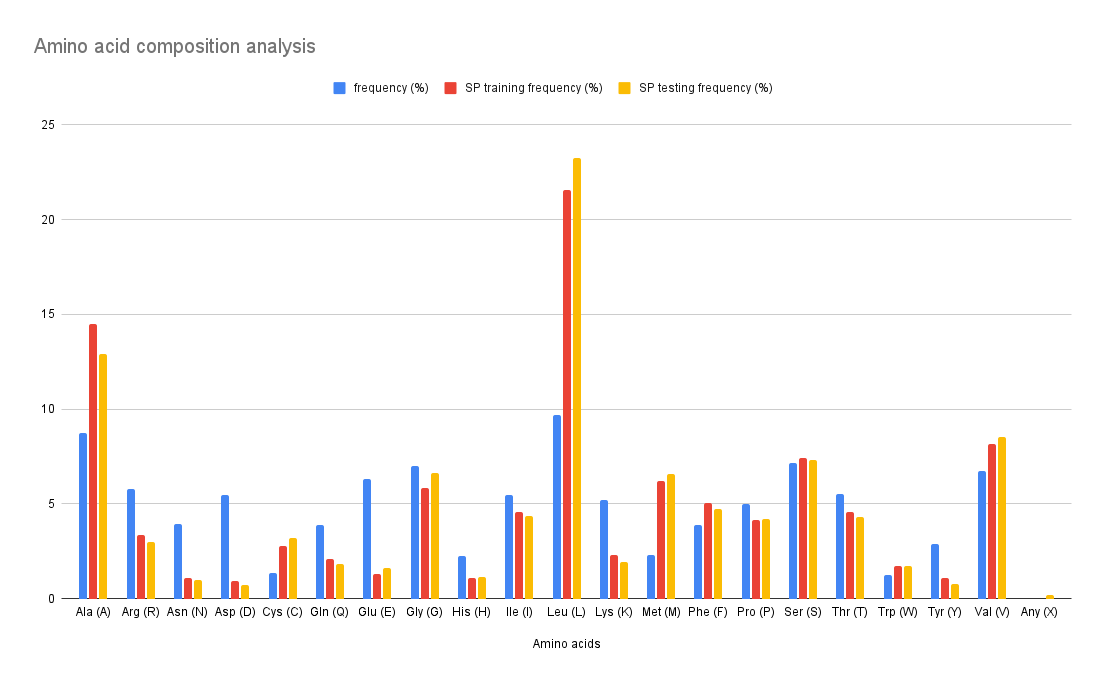

## 4. Taxonomic classification

In [ ]:
# Count the occurrences of each kingdom
kingdom_counts_tr = training['Kingdom'].value_counts()
kingdom_counts_tr_sp = training_SP['Kingdom'].value_counts()
kingdom_counts_tr_nosp = training_noSP['Kingdom'].value_counts()
kingdom_counts_test = testing['Kingdom'].value_counts()
kingdom_counts_test_sp = testing_SP['Kingdom'].value_counts()
kingdom_counts_test_nosp = testing_noSP['Kingdom'].value_counts()

# Count the occurrences of each species
species_counts_tr = training['Species'].value_counts()
species_counts_tr_sp = training_SP['Species'].value_counts()
species_counts_tr_nosp = training_noSP['Species'].value_counts()
species_counts_test = testing['Species'].value_counts()
species_counts_test_sp = testing_SP['Species'].value_counts()
species_counts_test_nosp = testing_noSP['Species'].value_counts()

# Create a threshold option and filter
total_count_tr = len(training)
total_count_tr_sp = len(training_SP)
total_count_tr_nosp = len(training_noSP)
total_count_test = len(testing)
total_count_test_sp = len(testing_SP)
total_count_test_nosp = len(testing_noSP)
species_abthresh_tr = species_counts_tr[species_counts_tr / total_count_tr * 100 > 4.9]
species_abthresh_tr_sp = species_counts_tr_sp[species_counts_tr_sp / total_count_tr_sp * 100 > 4.9]
species_abthresh_tr_nosp = species_counts_tr_nosp[species_counts_tr_nosp / total_count_tr_nosp * 100 > 4.9]
species_abthresh_test = species_counts_test[species_counts_test / total_count_test * 100 > 4.9]
species_abthresh_test_sp = species_counts_test_sp[species_counts_test_sp / total_count_test_sp * 100 > 4.9]
species_abthresh_test_nosp = species_counts_test_nosp[species_counts_test_nosp / total_count_test_nosp * 100 > 4.9]

# Create a new "Other" category with the count of species below the threshold
species_bethresh_tr = species_counts_tr[species_counts_tr / total_count_tr * 100 <= 4.9].sum()
species_bethresh_tr_sp = species_counts_tr_sp[species_counts_tr_sp / total_count_tr_sp * 100 <= 4.9].sum()
species_bethresh_tr_nosp = species_counts_tr_nosp[species_counts_tr_nosp / total_count_tr_nosp * 100 <= 4.9].sum()
species_abthresh_tr['Other'] = species_bethresh_tr
species_abthresh_tr_sp['Other'] = species_bethresh_tr_sp
species_abthresh_tr_nosp['Other'] = species_bethresh_tr_nosp
species_bethresh_test = species_counts_test[species_counts_test / total_count_test * 100 <= 4.9].sum()
species_bethresh_test_sp = species_counts_test_sp[species_counts_test_sp / total_count_test_sp * 100 <= 4.9].sum()
species_bethresh_test_nosp = species_counts_test_nosp[species_counts_test_nosp / total_count_test_nosp * 100 <= 4.9].sum()
species_abthresh_test_sp['Other'] = species_bethresh_test_sp
species_abthresh_test_nosp['Other'] = species_bethresh_test_nosp


Text(0.5, 1.0, 'Testing (no SP)')

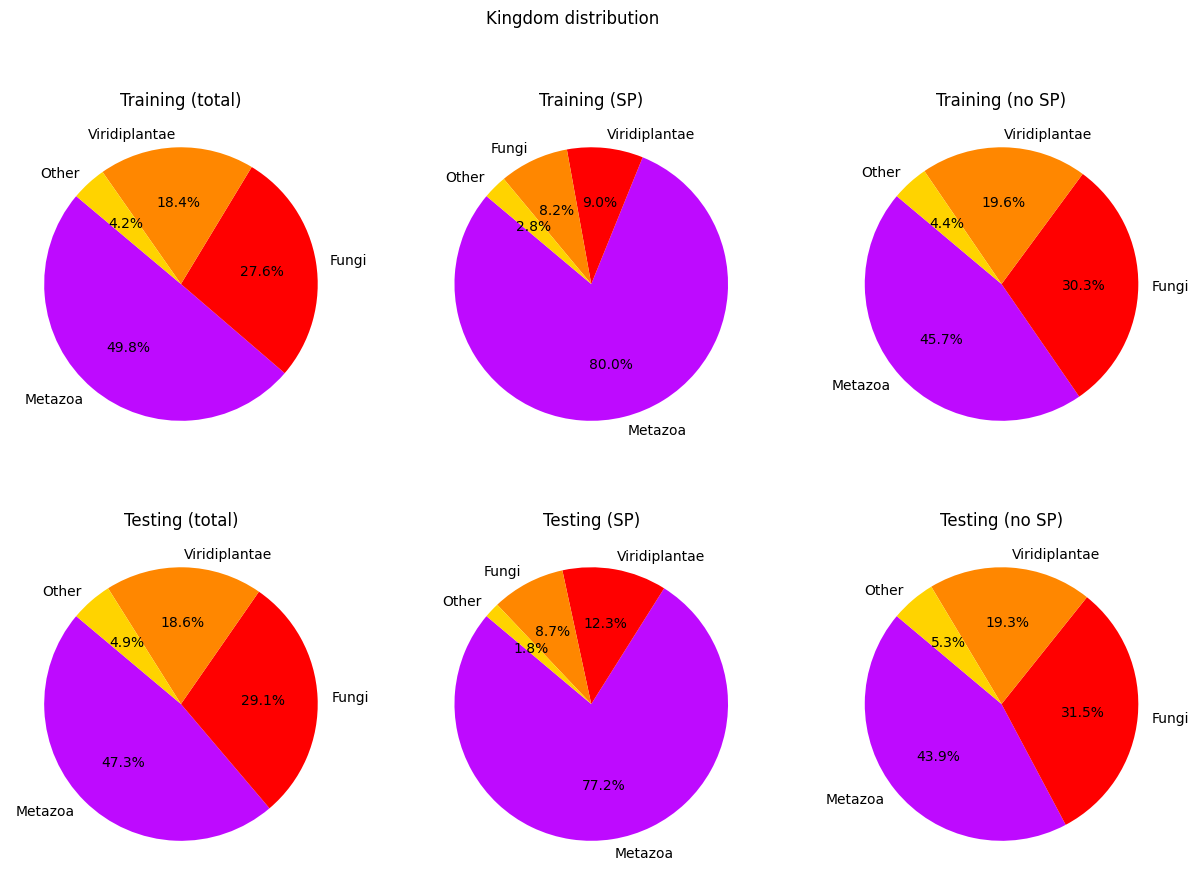

In [ ]:
# Plot the pie chart for Kingdom distribution
palette = ['#BE0AFF', '#FF0000', '#FF8700', '#FFD300', '#DEFF0A', '#A1FF0A', '#0AFF99', '#0AEFFF', '#147DF5', '#580AFF']
fig, axs = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Kingdom distribution')

axs[0,0].pie(kingdom_counts_tr, labels=kingdom_counts_tr.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,0].set_title('Training (total)')
axs[0,1].pie(kingdom_counts_tr_sp, labels=kingdom_counts_tr_sp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,1].set_title('Training (SP)')
axs[0,2].pie(kingdom_counts_tr_nosp, labels=kingdom_counts_tr_nosp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,2].set_title('Training (no SP)')

axs[1,0].pie(kingdom_counts_test, labels=kingdom_counts_test.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,0].set_title('Testing (total)')
axs[1,1].pie(kingdom_counts_test_sp, labels=kingdom_counts_test_sp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,1].set_title('Testing (SP)')
axs[1,2].pie(kingdom_counts_test_nosp, labels=kingdom_counts_test_nosp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,2].set_title('Testing (no SP)')

Text(0.5, 1.0, 'Testing (no SP)')

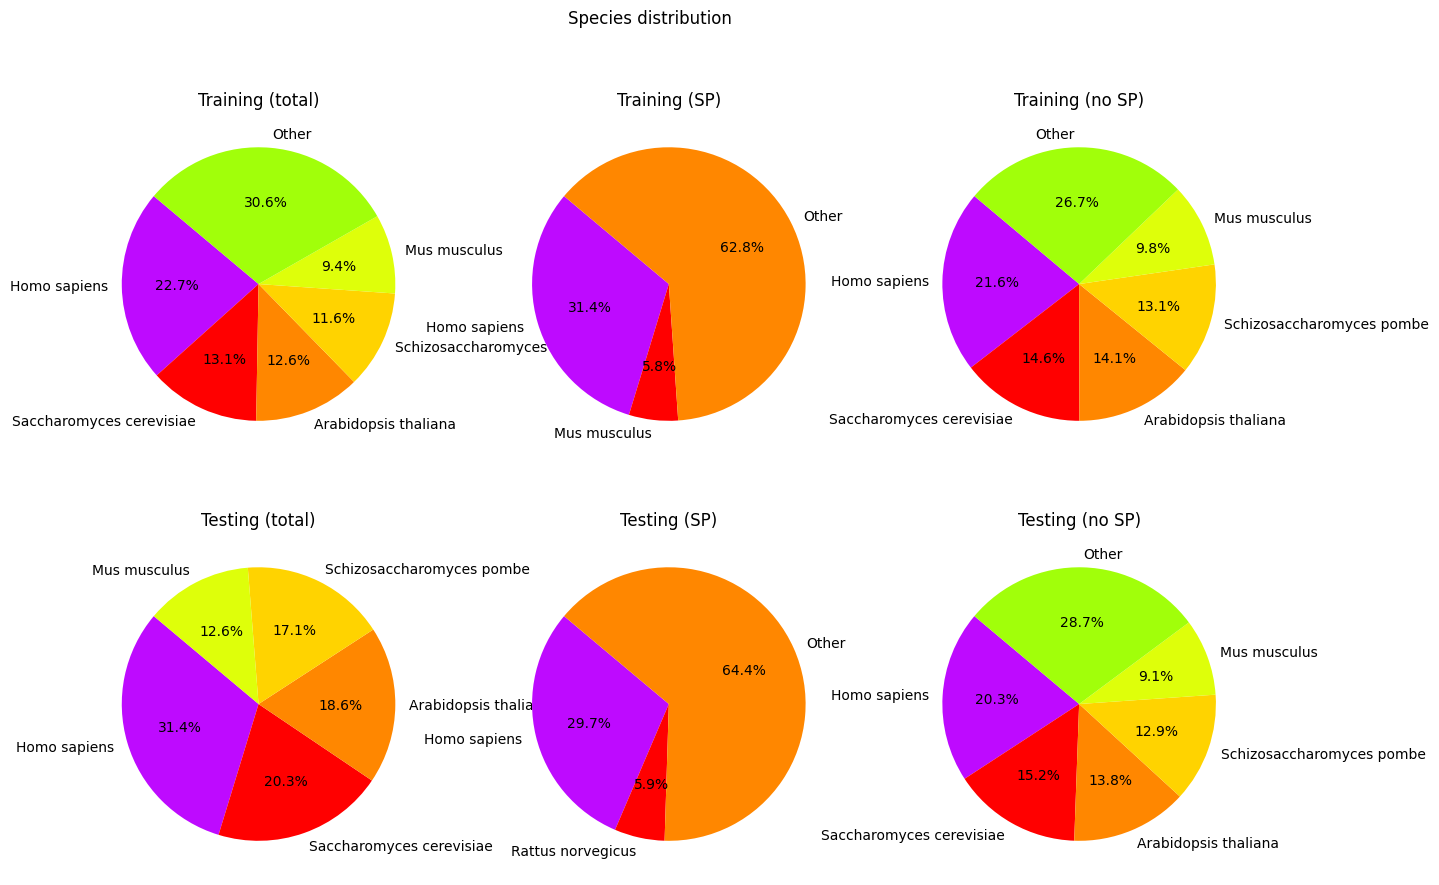

In [ ]:
# Plot the pie chart for species distribution
fig, axs = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Species distribution')

axs[0,0].pie(species_abthresh_tr, labels=species_abthresh_tr.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,0].set_title('Training (total)')
axs[0,1].pie(species_abthresh_tr_sp, labels=species_abthresh_tr_sp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,1].set_title('Training (SP)')
axs[0,2].pie(species_abthresh_tr_nosp, labels=species_abthresh_tr_nosp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0,2].set_title('Training (no SP)')

axs[1,0].pie(species_abthresh_test, labels=species_abthresh_test.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,0].set_title('Testing (total)')
axs[1,1].pie(species_abthresh_test_sp, labels=species_abthresh_test_sp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,1].set_title('Testing (SP)')
axs[1,2].pie(species_abthresh_test_nosp, labels=species_abthresh_test_nosp.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[1,2].set_title('Testing (no SP)')

## 5. Sequence logos of SP cleavage sites

We can use a slightly modified version of the previous code.
We are filtering the SP sequences to retain only SP signals longer or equal than 13 residues.

In [ ]:
sites_tr = []
sites_test = []

for i, row in training_SP.iterrows():
    sp_length = int(row["End"])
    if sp_length >= 13:
        sequence = str(row["Sequence"])
        site = sequence[sp_length - 13:sp_length + 2]
        sites_tr.append(site)

for i, row in testing_SP.iterrows():
    sp_length = int(row["End"])
    if sp_length >= 13:
        sequence = str(row["Sequence"])
        site = sequence[sp_length - 13:sp_length + 2]
        sites_test.append(site)


Export the 'alignments' in a text file. We can use this file to create a sequence logo.

In [ ]:
with open('data/training_logo.txt', 'w') as file:
    for sequence in sites_tr:
        file.write(sequence + '\n')

with open('data/testing_logo.txt', 'w') as file:
    for sequence in sites_test:
        file.write(sequence + '\n')

Here are the results:
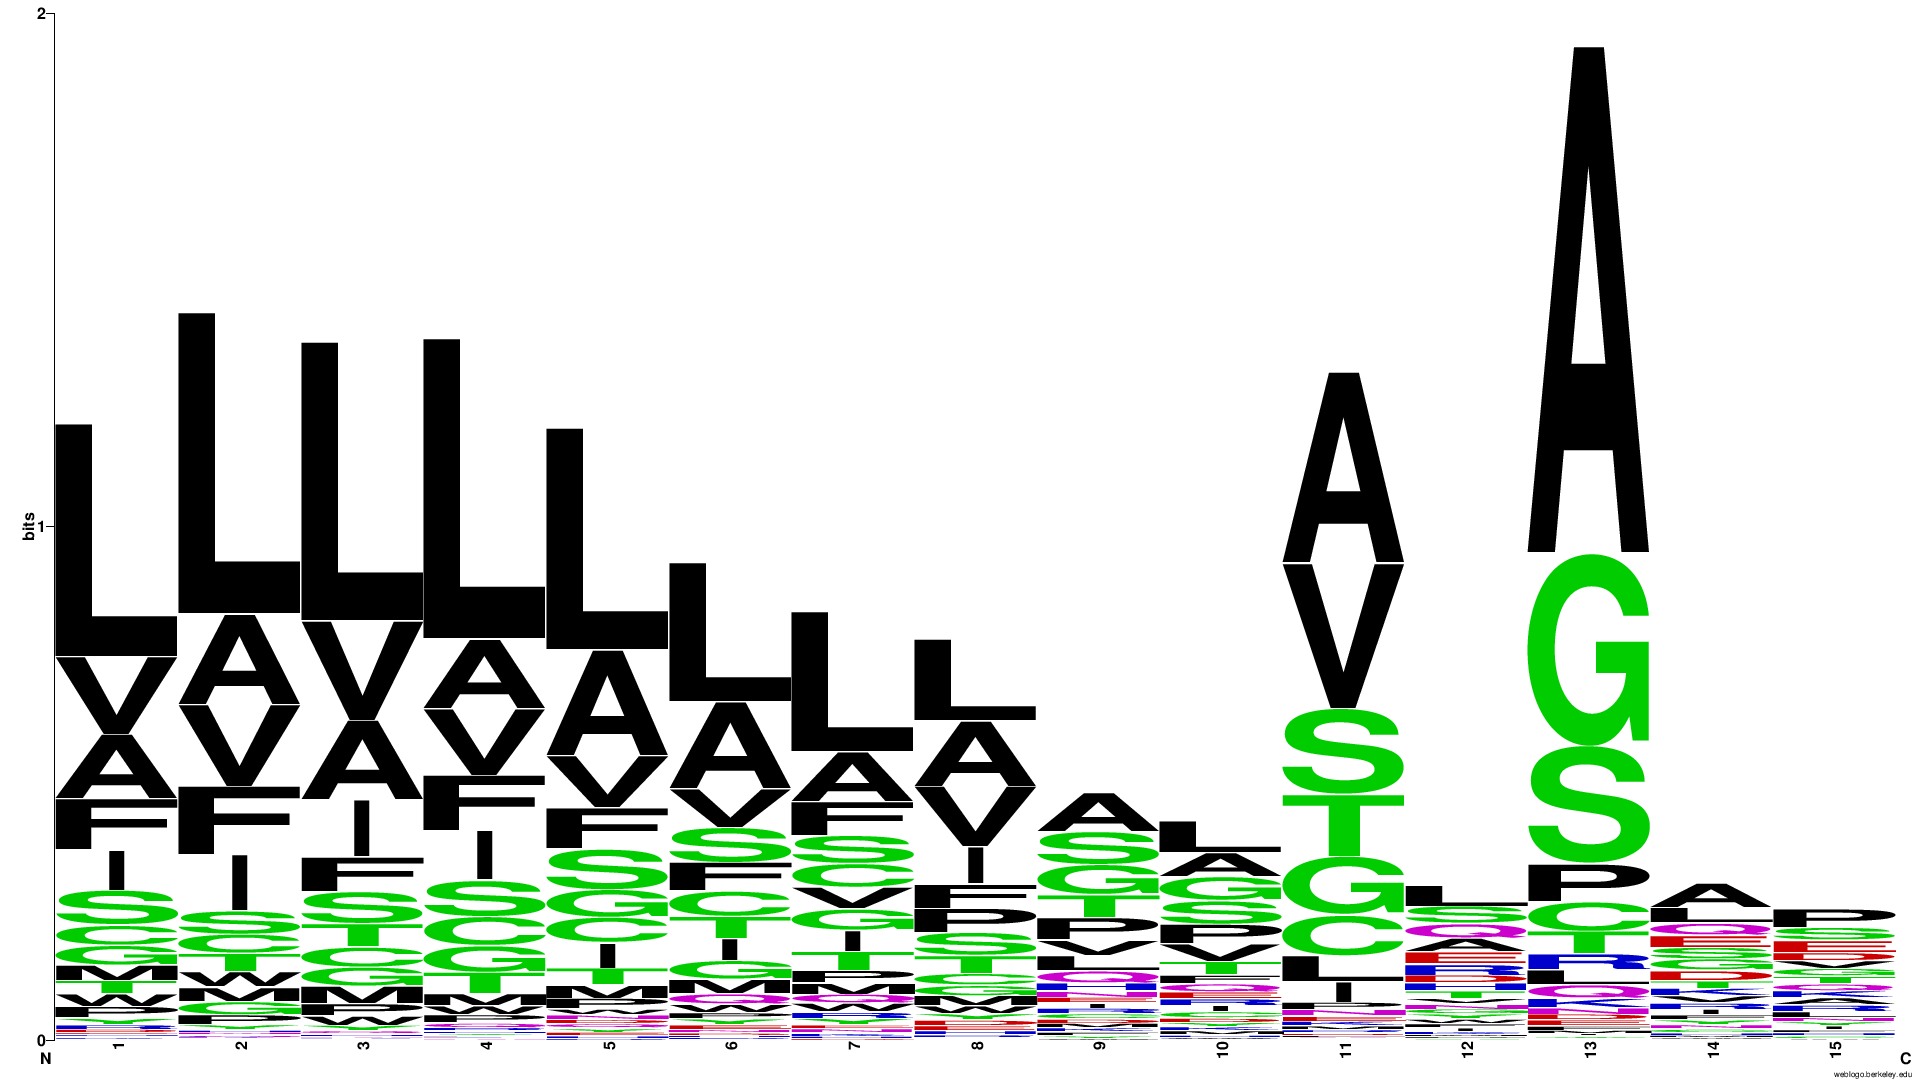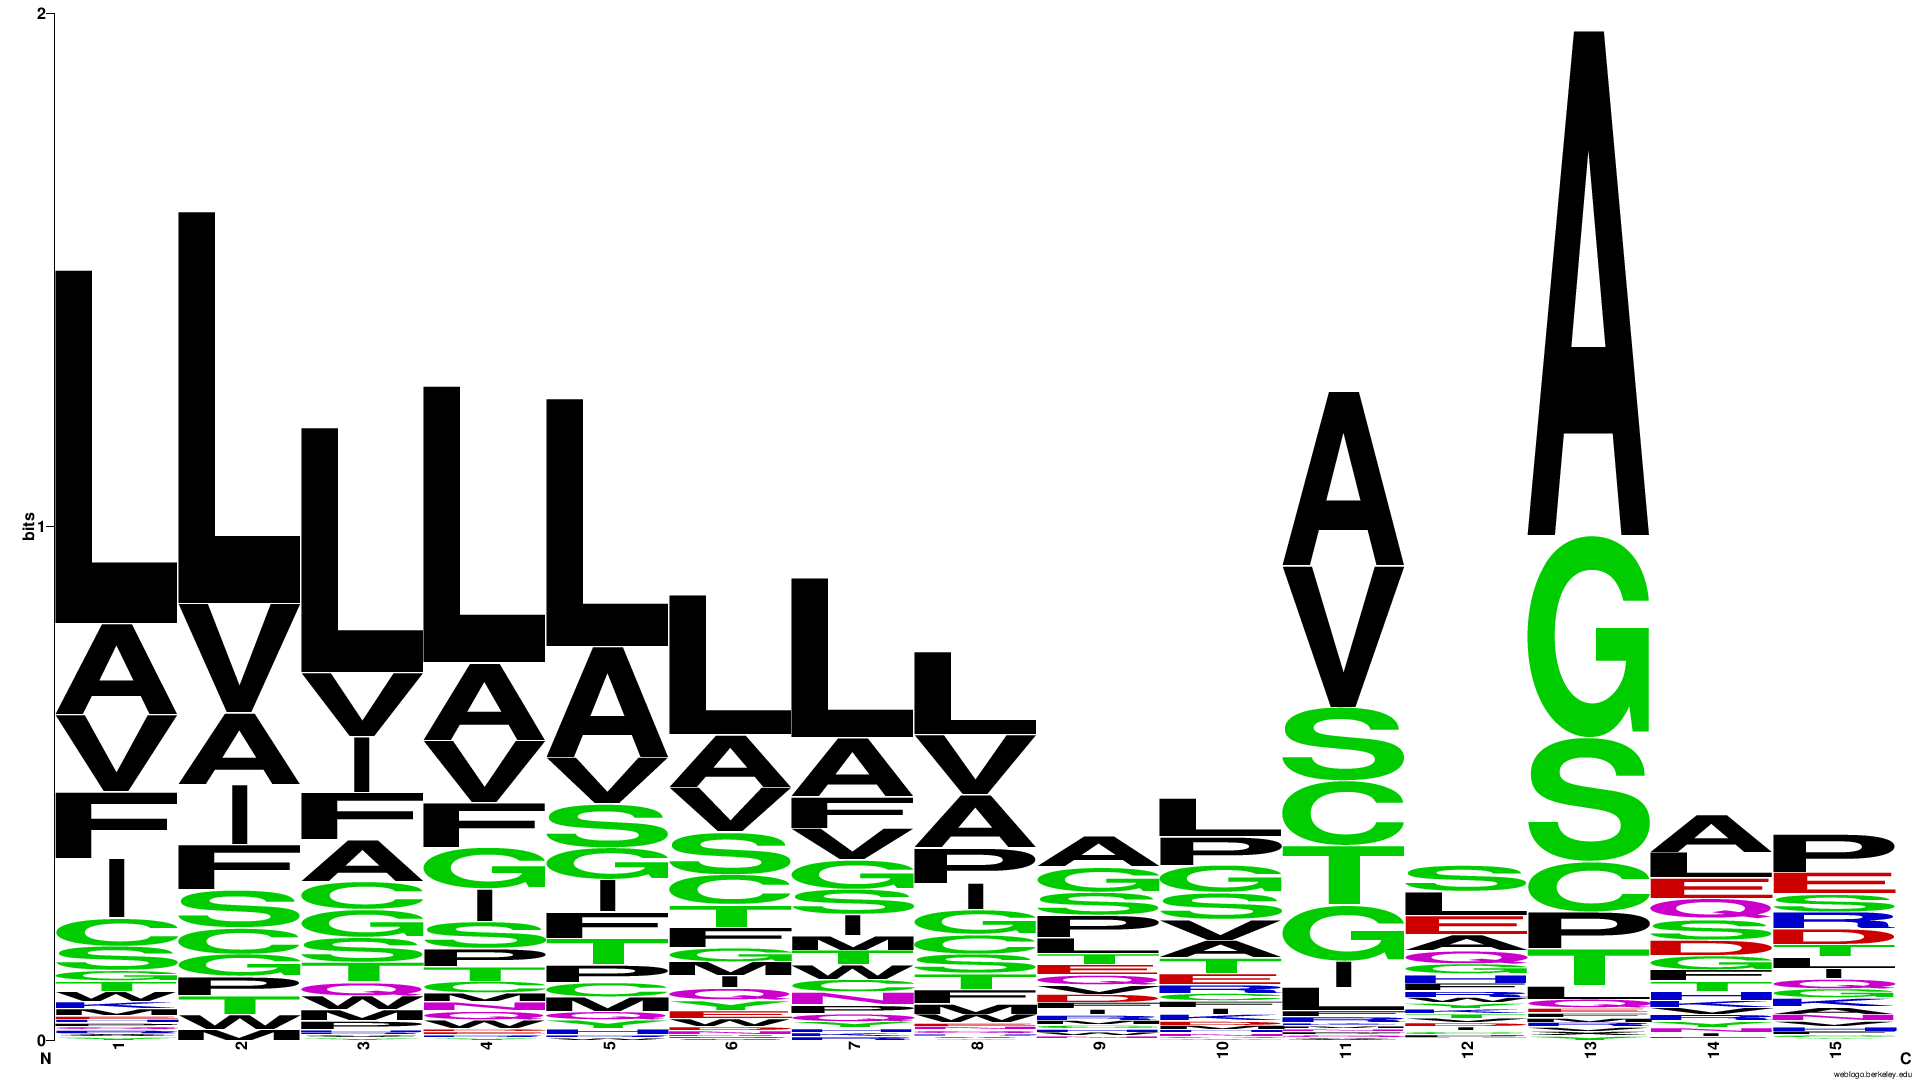